In [1]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,"In order to secure my session\nAs Admin,\nI wa...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,In order to log in to the system in case I for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,"In order to secure my account\nAs Lecturer,\nI...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program Outcomes,In order to establish Program Outcomes\nAs Cur...,Scenario: Create Program Outcomes Successfully...,Scenario: Create Program Outcomes Failed as th...,Scenario: Create Program Outcomes Failed Due t...,,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
166,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
167,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
168,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [2]:
# Fungsi untuk menggandakan data berdasarkan nilai di kolom 'Effort'
def duplicate_data(row):
    if row['Effort'] == 'M':
        return pd.DataFrame([row] * int(4620/55), columns=row.index)
    elif row['Effort'] == 'L':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)
    elif row['Effort'] == 'S':
        return pd.DataFrame([row] * int(4620/84), columns=row.index)
    elif row['Effort'] == 'XL':
        return pd.DataFrame([row] * int(4620/7), columns=row.index)
    elif row['Effort'] == 'XXL':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)

# Membuat DataFrame baru dengan data yang digandakan
df = pd.concat(df.apply(duplicate_data, axis=1).tolist(), ignore_index=True)

# Menampilkan DataFrame baru
df

,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
2,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
3,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
4,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23096,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23097,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23098,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL


In [3]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access curriculum data
As Admin,
I want to log in to the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lecturer”
A

In [4]:
# Numeric Feature Extraction
import re

def count_when_then_pair(text):
    # Mencari kemunculan "when" dan "then" secara terpisah
    matches_when = re.findall(r'\bwhen\b', text)
    matches_then = re.findall(r'\bthen\b', text)
    
    # Menghitung jumlah pasangan "when" dan "then"
    count_pair = min(len(matches_when), len(matches_then))
    
    return count_pair

# Menghitung jumlah token dan skenario
df['combined'] = df['combined'].str.lower()
df['number_word'] = df['combined'].apply(lambda x: len(x.split()))
df['number_scenario'] = df['combined'].apply(lambda x: x.count("scenario:"))
df['number_of_step'] = df['combined'].apply(count_when_then_pair)
df['number_of_S1'] = df['combined'].apply(lambda x: x.count("i am on"))
df['number_of_S2'] = df['combined'].apply(lambda x: x.count("i press"))
df['number_of_S3'] = df['combined'].apply(lambda x: x.count("i follow"))
df['number_of_F1'] = df['combined'].apply(lambda x: x.count("i fill in "))
df['number_of_F2'] = df['combined'].apply(lambda x: x.count("i select"))
df['number_of_F3'] = df['combined'].apply(lambda x: x.count("i check"))
df['number_of_F4'] = df['combined'].apply(lambda x: x.count("i uncheck"))
df['number_of_F5'] = df['combined'].apply(lambda x: x.count("i attach"))
df['number_of_A1'] = df['combined'].apply(lambda x: x.count("i should see"))
df['number_of_A2'] = df['combined'].apply(lambda x: x.count("the response should contain"))
df['number_of_A3'] = df['combined'].apply(lambda x: x.count("field should contain"))
df['number_of_A4'] = df['combined'].apply(lambda x: x.count("checkbox should be checked"))
df['number_of_A5'] = df['combined'].apply(lambda x: x.count("checkbox should not be checked"))
df['number_of_A6'] = df['combined'].apply(lambda x: x.count("i should be on"))
df['number_of_A7'] = df['combined'].apply(lambda x: x.count("the url should match"))

print(df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']])

       number_word  number_scenario  number_of_step  number_of_S1  \
0              193                4               4             4   
1              193                4               4             4   
2              193                4               4             4   
3              193                4               4             4   
4              193                4               4             4   
...            ...              ...             ...           ...   
23095           71                1               2             1   
23096           71                1               2             1   
23097           71                1               2             1   
23098           71                1               2             1   
23099           71                1               2             1   

       number_of_S2  number_of_S3  number_of_F1  number_of_F2  number_of_F3  \
0                 4             0             8             0             0   
1            

Text Feature Extraction

In [5]:
# Case Folding and Remove Template
import re

def case_folding(text):
    return text.lower()

def remove_template_phrases(text):
    template_texts = [
        "In order to",
        "As",
        "I want",
        "I am on",
        "I press",
        "I follow",
        "I fill in",
        "I select",
        "I check",
        "I uncheck",
        "I attach the file",
        "I should see",
        "The response should contain",
        "field should contain",
        "checkbox should be checked",
        "checkbox should not be checked",
        "I should be on",
        "The url should match"
    ]

    pattern = r'\s+(' + '|'.join(template_texts) + r')\s+'
    return re.sub(pattern, ' ', text, flags=re.IGNORECASE)

df['combined'] = df['combined'].apply(case_folding)
df['combined'] = df['combined'].apply(remove_template_phrases)

In [6]:
# Remove Punctuation, Tokenisasi, Stopword Removal
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['combined'] = df['combined'].apply(remove_punctuation)
print("Hasil pembersihan teks dari tanda baca")
print(df.loc[0, 'combined'])

# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['combined'] = df['combined'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['combined'])

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['combined'] = df['combined'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['combined'][4])

Hasil pembersihan teks dari tanda baca
login access curriculum data admin  to log in to the system
scenario  login successfully admin 
given  http   127 0 0 1 8000 login 
when  nip  with  32525252523 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard admin 
and the  lecturer name   admin 
scenario  login successfully curriculum team member
given  http   127 0 0 1 8000 login 
when  nip  with  197801262006041001 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard curriculum 
and the  lecturer name   badrus zaman  s kom   m cs  	
scenario  login successfully lecturer 
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard lecturer 
and the  lecturer name   indra kharisma r  s kom   m t  
scenario  login failed due to incorrect nip or password
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Hasil stopword removal
['login', 'access', 'curriculum', 'data', 'admin', 'log', 'system', 'scenario', 'login', 'successfully', 'admin', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '32525252523', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'admin', 'lecturer', 'name', 'admin', 'scenario', 'login', 'successfully', 'curriculum', 'team', 'member', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '197801262006041001', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'lecturer', 'name', 'badrus', 'zaman', 'kom', 'cs', 'scenario', 'login', 'successfully', 'lecturer', 'given', 'http', '127', '0', '0', '1', '8000', 'login', 'nip', '198110282006041003', 'password', 'coba123', 'login', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'lecturer', 'lecturer', 'name', 'indra', 'kharisma', 'r', 'kom', 'scenario', 'login', 'failed', 'due', 'incorrect', 'nip', 'password', 'given', 

In [7]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['combined'] = df['combined'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['combined']

Hasil lematisasi


0        [login, access, curriculum, data, admin, log, ...
1        [login, access, curriculum, data, admin, log, ...
2        [login, access, curriculum, data, admin, log, ...
3        [login, access, curriculum, data, admin, log, ...
4        [login, access, curriculum, data, admin, log, ...
                               ...                        
23095    [delete, user, story, history, remove, irrelev...
23096    [delete, user, story, history, remove, irrelev...
23097    [delete, user, story, history, remove, irrelev...
23098    [delete, user, story, history, remove, irrelev...
23099    [delete, user, story, history, remove, irrelev...
Name: combined, Length: 23100, dtype: object

In [8]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengembalikan ke bentuk string
df['combined'] = df['combined'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,04,100,105,127,15,197101042008121001,197102111997021001,197801262006041001,198105082005012001,198110282006041003,...,within,wlfv,workshop,world,wth,x0002,xlsx,yamamaru,year,zaman
0,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
1,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
2,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
3,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
4,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23096,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23097,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23098,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
# Data Integration
integrated_data = pd.concat([tfidf_df, df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]], axis=1)
integrated_data

,04,100,105,127,15,197101042008121001,197102111997021001,197801262006041001,198105082005012001,198110282006041003,...,number_of_F3,number_of_F4,number_of_F5,number_of_A1,number_of_A2,number_of_A3,number_of_A4,number_of_A5,number_of_A6,number_of_A7
0,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0,0,0,0,1,3,0,0,0,3
1,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0,0,0,0,1,3,0,0,0,3
2,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0,0,0,0,1,3,0,0,0,3
3,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0,0,0,0,1,3,0,0,0,3
4,0.0,0.0,0.0,0.107986,0.0,0.0,0.0,0.101892,0.0,0.107314,...,0,0,0,0,1,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0
23096,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0
23097,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0
23098,0.0,0.0,0.0,0.061330,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0


In [10]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


Class distribution:
L: 0.20
M: 0.20
S: 0.20
XL: 0.20
XXL: 0.20
Total count of each class:
L: 4620.0
M: 4620.0
S: 4620.0
XL: 4620.0
XXL: 4620.0


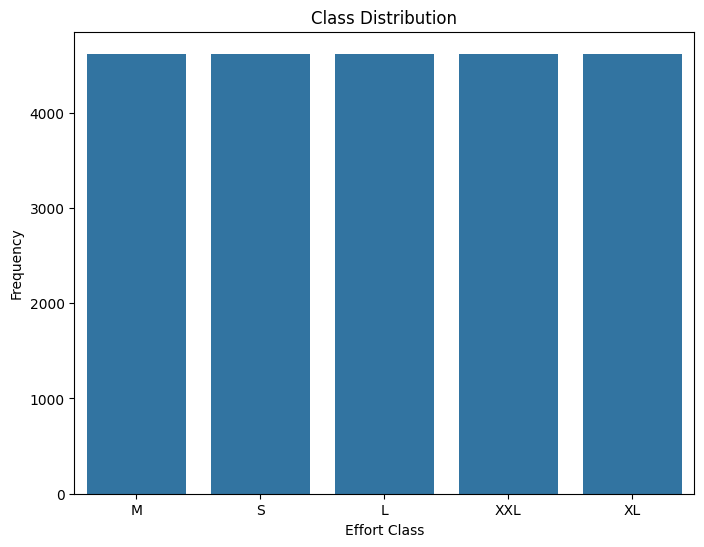

In [11]:
# Distribusi Kelas
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

====================Adaboost====================

Classification report for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       1.00      0.02      0.04      3864
           S       0.10      0.94      0.18       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.10      0.09      0.10     11179
   macro avg       0.22      0.19      0.04     11179
weighted avg       0.35      0.09      0.03     11179
 samples avg       0.09      0.09      0.09     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.3542438107399231     Recall: 0.0911530548349584      Accuracy: 0.0911530548349584      F1 Score: 0.030297731121519487

Confusion matrix for test project 'Akobesi':


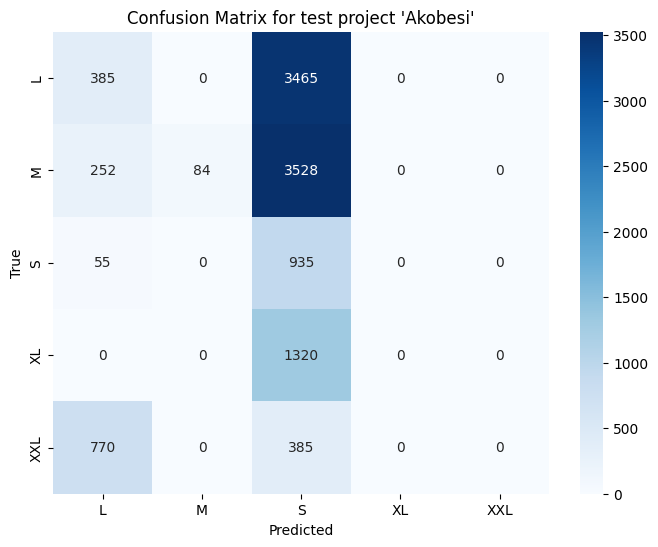

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.44      0.37      0.40      3864
           S       0.14      1.00      0.24       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.22      0.22      0.22     11179
   macro avg       0.12      0.27      0.13     11179
weighted avg       0.16      0.22      0.16     11179
 samples avg       0.17      0.22      0.18     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.16423504139876938     Recall: 0.2162984166741211      Accuracy: 0.11888362107523034      F1 Score: 0.16009114180657594

Confusion matrix for test project 'Akobesi':


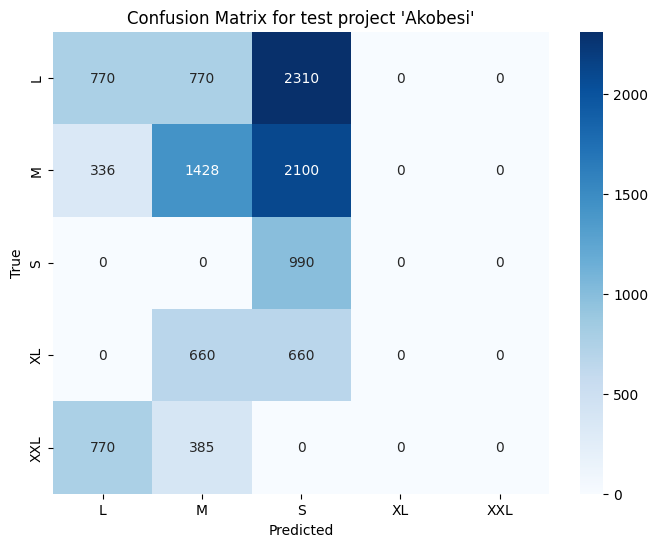

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.59      0.40      0.48      3850
           M       0.10      0.04      0.06      3864
           S       0.05      0.33      0.08       990
          XL       0.00      0.00      0.00      1320
         XXL       0.14      0.67      0.24      1155

   micro avg       0.14      0.25      0.18     11179
   macro avg       0.17      0.29      0.17     11179
weighted avg       0.25      0.25      0.22     11179
 samples avg       0.11      0.25      0.14     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.2545413235985253     Recall: 0.25118525807317293      Accuracy: 0.059039270059933806      F1 Score: 0.21624943904726043

Confusion matrix for test project 'Akobesi':


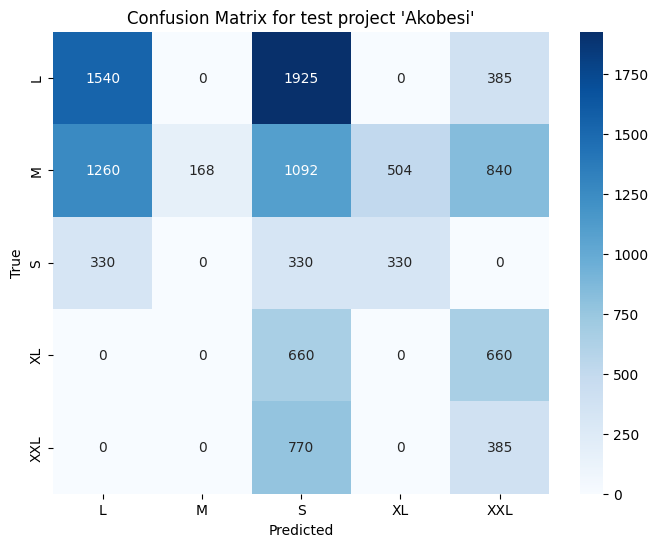

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.77      0.83      0.80       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.55      0.34      0.42       799
   macro avg       0.15      0.17      0.16       799
weighted avg       0.32      0.34      0.33       799
 samples avg       0.34      0.34      0.34       799

Precision: 0.31637736585773996     Recall: 0.344180225281602      Accuracy: 0.344180225281602      F1 Score: 0.3296936845948582

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

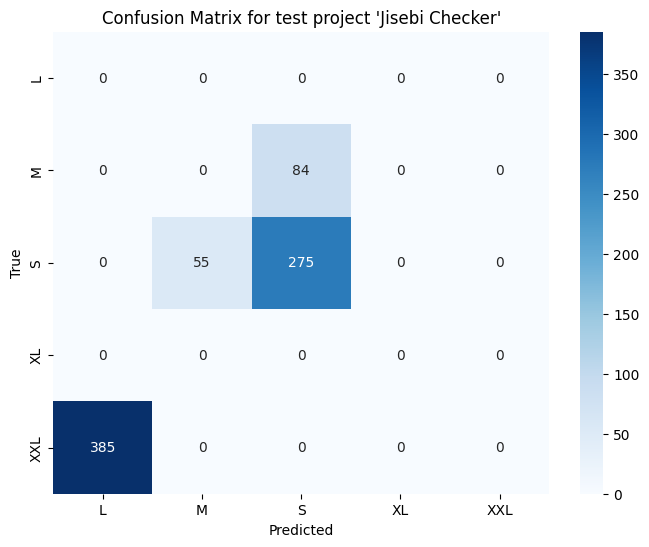

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.77      0.83      0.80       330
          XL       0.00      0.00      0.00         0
         XXL       0.82      1.00      0.90       385

   micro avg       0.75      0.83      0.78       799
   macro avg       0.32      0.37      0.34       799
weighted avg       0.71      0.83      0.76       799
 samples avg       0.83      0.83      0.83       799

Precision: 0.7119277740171931     Recall: 0.8260325406758448      Accuracy: 0.8260325406758448      F1 Score: 0.7641506902781919

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

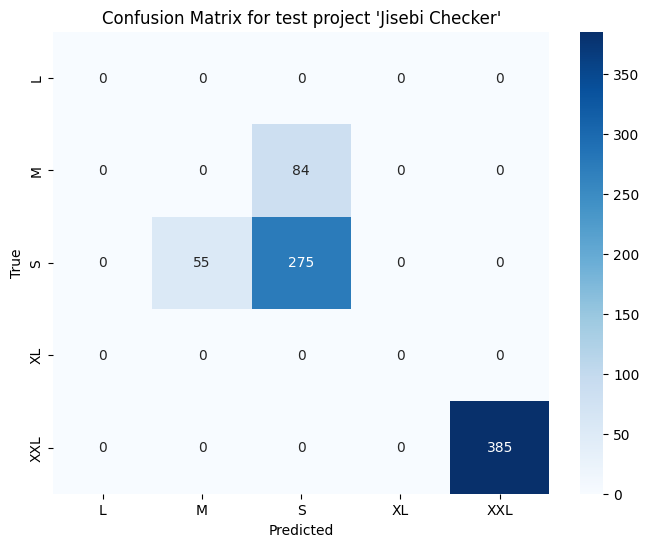

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      1.00      1.00       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.38      0.41      0.39       799
   macro avg       0.20      0.20      0.20       799
weighted avg       0.41      0.41      0.41       799
 samples avg       0.31      0.41      0.34       799



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.4130162703379224     Recall: 0.4130162703379224      Accuracy: 0.2065081351689612      F1 Score: 0.4130162703379224

Confusion matrix for test project 'Jisebi Checker':


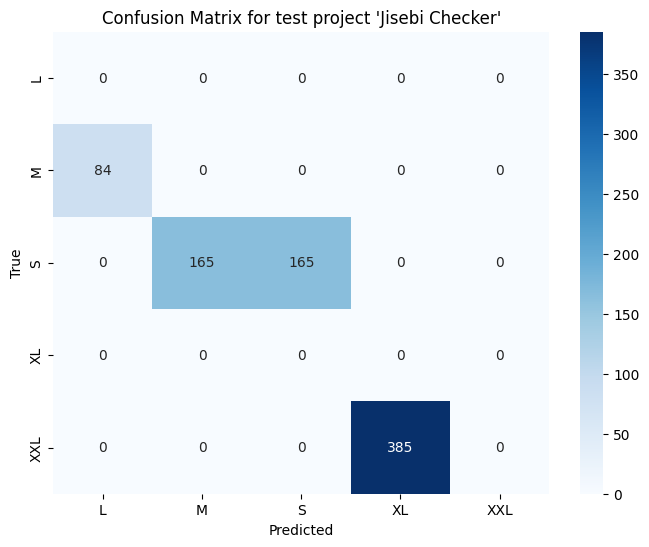

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       0.78      1.00      0.88       385

   micro avg       0.80      0.75      0.77       880
   macro avg       0.36      0.31      0.32       880
weighted avg       0.90      0.75      0.78       880
 samples avg       0.75      0.75      0.75       880

Precision: 0.9027777777777778     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7845982142857144

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

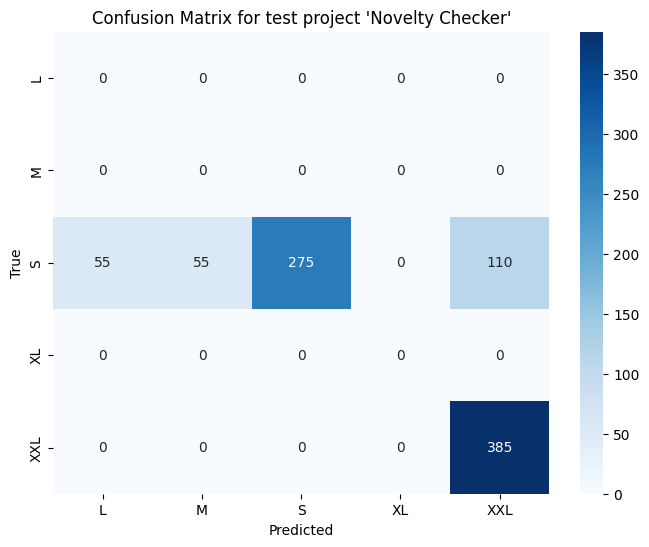

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       0.78      1.00      0.88       385

   micro avg       0.80      0.75      0.77       880
   macro avg       0.36      0.31      0.32       880
weighted avg       0.90      0.75      0.78       880
 samples avg       0.75      0.75      0.75       880

Precision: 0.9027777777777778     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7845982142857144

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

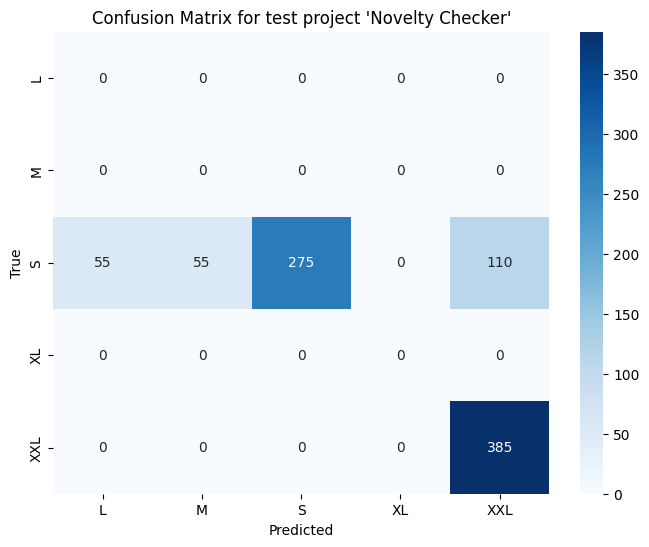

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       0.78      1.00      0.88       385

   micro avg       0.67      0.75      0.71       880
   macro avg       0.36      0.31      0.32       880
weighted avg       0.90      0.75      0.78       880
 samples avg       0.66      0.75      0.69       880

Precision: 0.9027777777777778     Recall: 0.75      Accuracy: 0.5625      F1 Score: 0.7845982142857144

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

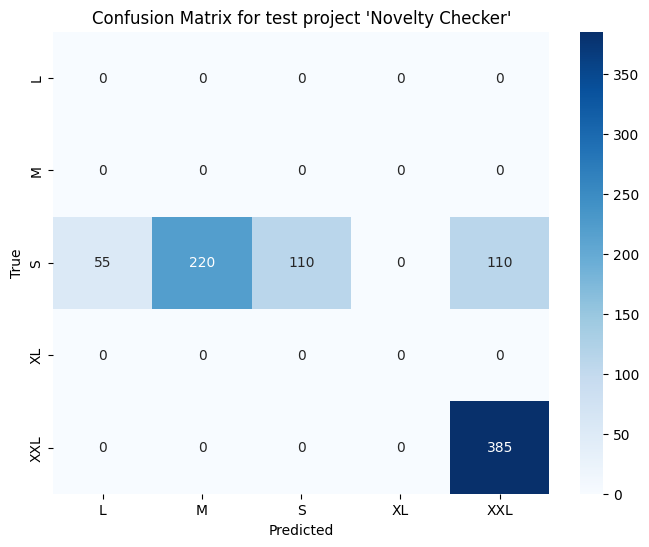

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.43      1.00      0.60        84
           S       0.24      0.80      0.36       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.25      0.25      0.25      2064
   macro avg       0.13      0.36      0.19      2064
weighted avg       0.08      0.25      0.12      2064
 samples avg       0.25      0.25      0.25      2064

Precision: 0.08032117186361477     Recall: 0.25387596899224807      Accuracy: 0.25387596899224807      F1 Score: 0.1214935028721209

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


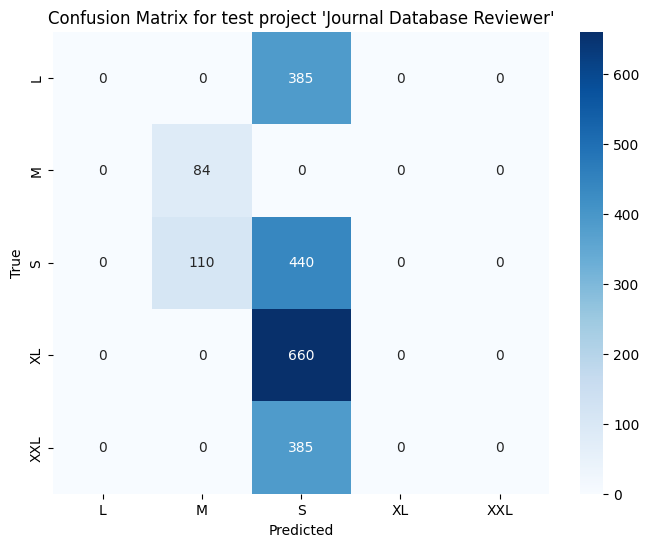

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.34      1.00      0.50        84
           S       0.33      0.70      0.45       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.26      0.23      0.24      2064
   macro avg       0.13      0.34      0.19      2064
weighted avg       0.10      0.23      0.14      2064
 samples avg       0.21      0.23      0.22      2064

Precision: 0.10255362535412968     Recall: 0.22722868217054262      Accuracy: 0.2005813953488372      F1 Score: 0.1408747457134554

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

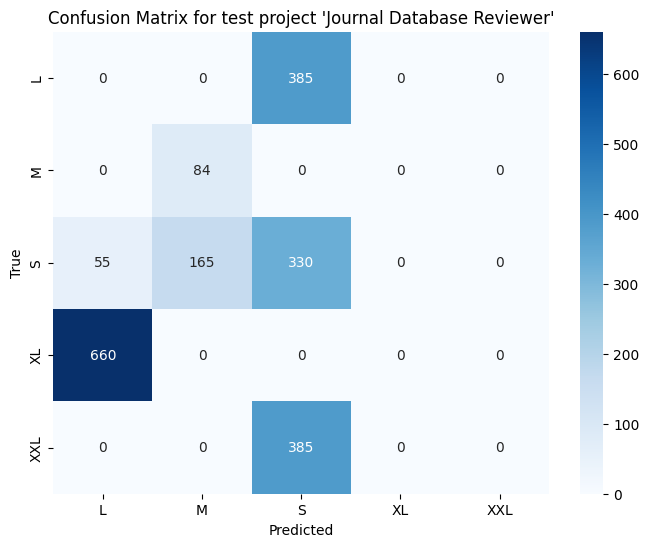

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.06      1.00      0.11        84
           S       0.28      0.60      0.38       550
          XL       0.00      0.00      0.00       660
         XXL       0.78      1.00      0.88       385

   micro avg       0.22      0.39      0.28      2064
   macro avg       0.22      0.52      0.27      2064
weighted avg       0.22      0.39      0.27      2064
 samples avg       0.23      0.39      0.28      2064

Precision: 0.22160797739577004     Recall: 0.3871124031007752      Accuracy: 0.07994186046511628      F1 Score: 0.26891889503494737

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


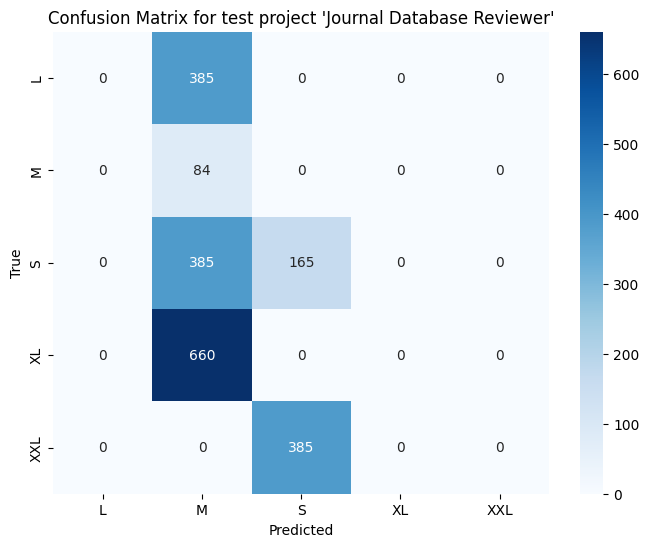

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.57      0.67      0.61       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.40      0.11      0.17       993
   macro avg       0.11      0.13      0.12       993
weighted avg       0.09      0.11      0.10       993
 samples avg       0.11      0.11      0.11       993

Precision: 0.09421621453265643     Recall: 0.1107754279959718      Accuracy: 0.1107754279959718      F1 Score: 0.10182699509379023

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

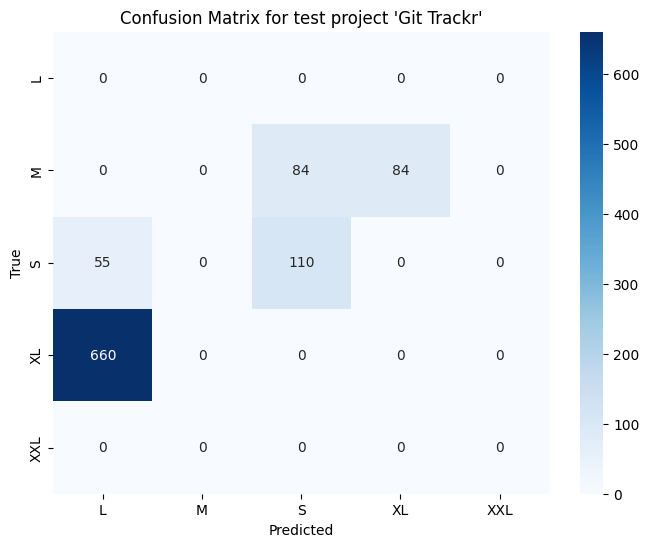

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       1.00      0.67      0.80       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.57      0.11      0.19       993
   macro avg       0.20      0.13      0.16       993
weighted avg       0.17      0.11      0.13       993
 samples avg       0.11      0.11      0.11       993

Precision: 0.1661631419939577     Recall: 0.1107754279959718      Accuracy: 0.1107754279959718      F1 Score: 0.13293051359516617

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

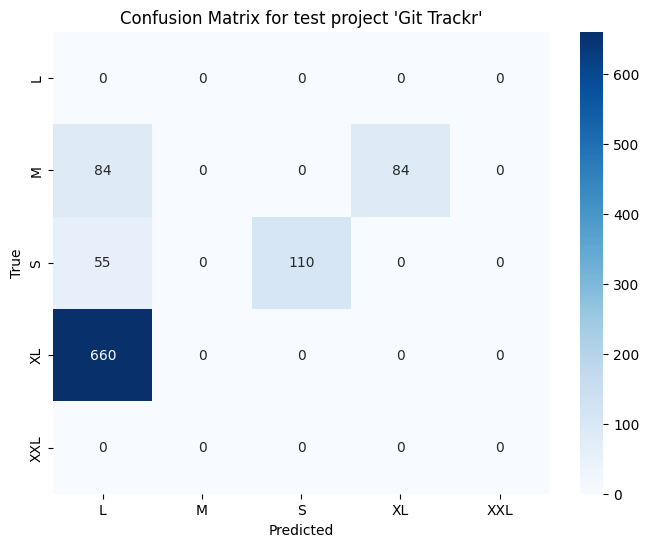

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67       168
           S       0.57      0.67      0.61       165
          XL       0.77      1.00      0.87       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.75      0.86      0.80       993
   macro avg       0.47      0.43      0.43       993
weighted avg       0.78      0.86      0.79       993
 samples avg       0.79      0.86      0.81       993

Precision: 0.777066423607421     Recall: 0.8600201409869084      Accuracy: 0.7200402819738168      F1 Score: 0.7941022481531848

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

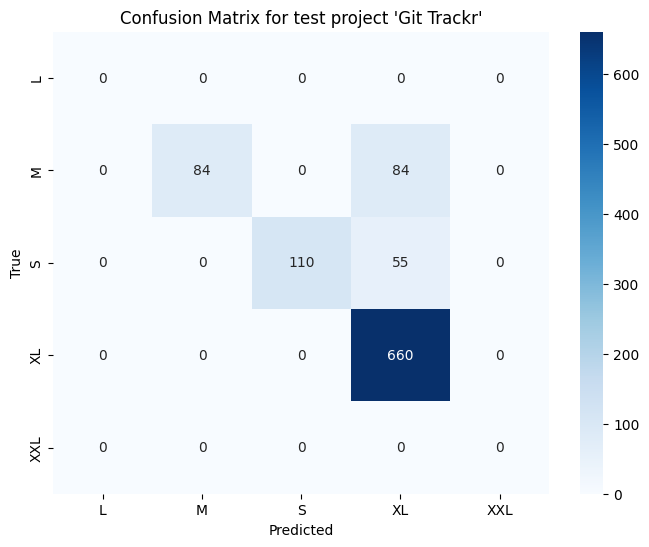

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.25      0.40       880
   macro avg       0.20      0.20      0.20       880
weighted avg       0.25      0.25      0.25       880
 samples avg       0.25      0.25      0.25       880

Precision: 0.25     Recall: 0.25      Accuracy: 0.25      F1 Score: 0.25

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

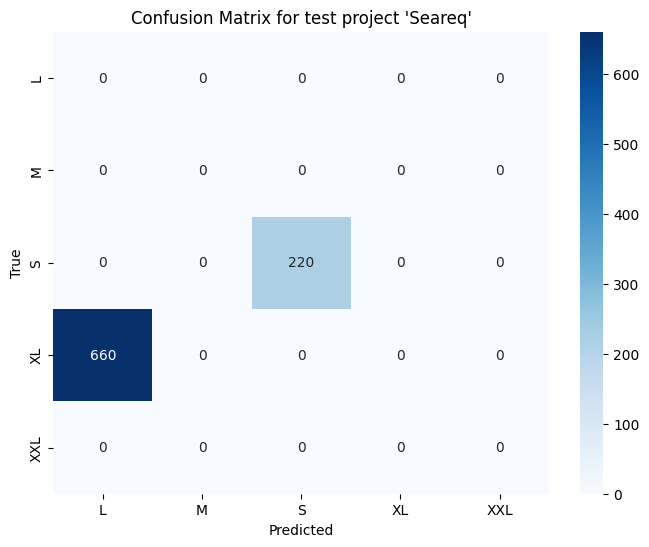

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.25      0.40       880
   macro avg       0.20      0.20      0.20       880
weighted avg       0.25      0.25      0.25       880
 samples avg       0.25      0.25      0.25       880

Precision: 0.25     Recall: 0.25      Accuracy: 0.25      F1 Score: 0.25

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

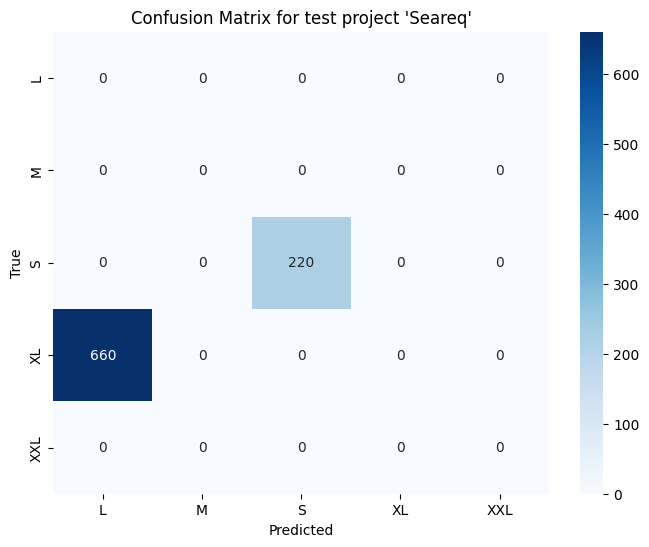

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.25      0.40       220
          XL       0.86      1.00      0.92       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.41      0.81      0.54       880
   macro avg       0.37      0.25      0.26       880
weighted avg       0.89      0.81      0.79       880
 samples avg       0.39      0.81      0.53       880

Precision: 0.8928571428571428     Recall: 0.8125      Accuracy: 0.0      F1 Score: 0.7923076923076923

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

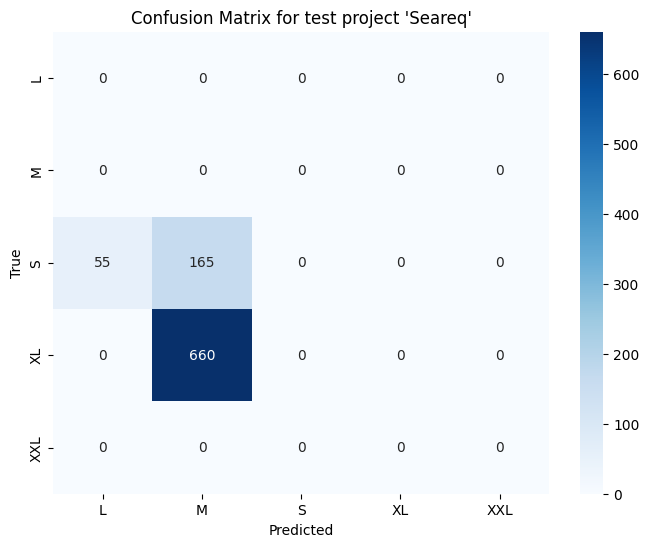

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       1.00      0.50      0.67       168
           S       0.87      0.67      0.75       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.82      0.46      0.59      1378
   macro avg       0.37      0.23      0.28      1378
weighted avg       0.64      0.46      0.53      1378
 samples avg       0.46      0.46      0.46      1378

Precision: 0.6412873775828363     Recall: 0.46008708272859217      Accuracy: 0.46008708272859217      F1 Score: 0.5326570179984899

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

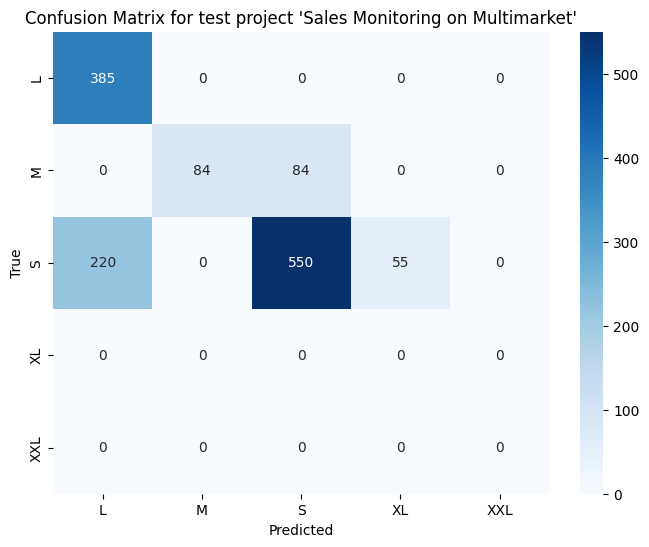

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       1.00      0.50      0.67       168
           S       1.00      0.47      0.64       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.34      0.51      1378
   macro avg       0.40      0.19      0.26      1378
weighted avg       0.72      0.34      0.46      1378
 samples avg       0.34      0.34      0.34      1378

Precision: 0.7206095791001451     Recall: 0.34034833091436867      Accuracy: 0.34034833091436867      F1 Score: 0.46226415094339623

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

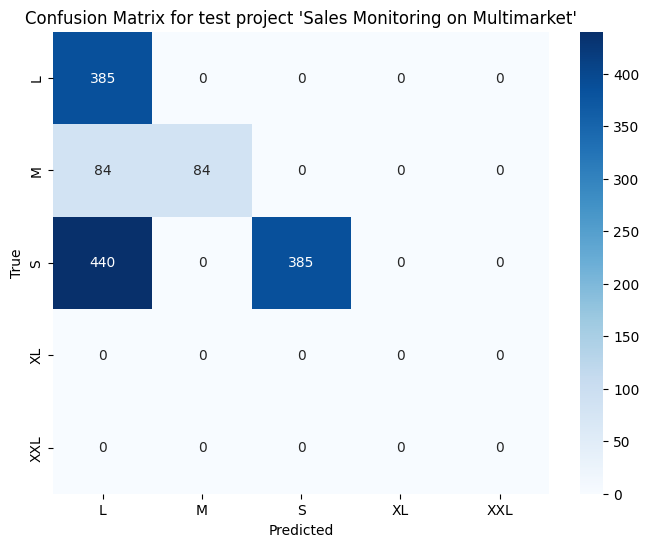

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.14      1.00      0.24       168
           S       0.47      0.60      0.53       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.19      0.48      0.27      1378
   macro avg       0.12      0.32      0.15      1378
weighted avg       0.30      0.48      0.35      1378
 samples avg       0.24      0.48      0.30      1378

Precision: 0.2996652629005252     Recall: 0.4811320754716981      Accuracy: 0.07982583454281568      F1 Score: 0.34611020653328084

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

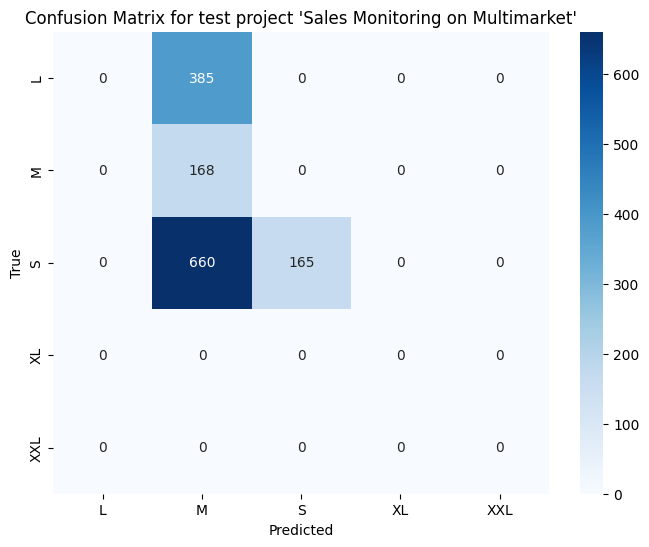

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      1.00      1.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       1.00      0.32      0.48      1129
   macro avg       0.40      0.40      0.40      1129
weighted avg       0.32      0.32      0.32      1129
 samples avg       0.32      0.32      0.32      1129

Precision: 0.3179805137289637     Recall: 0.3179805137289637      Accuracy: 0.3179805137289637      F1 Score: 0.3179805137289637

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

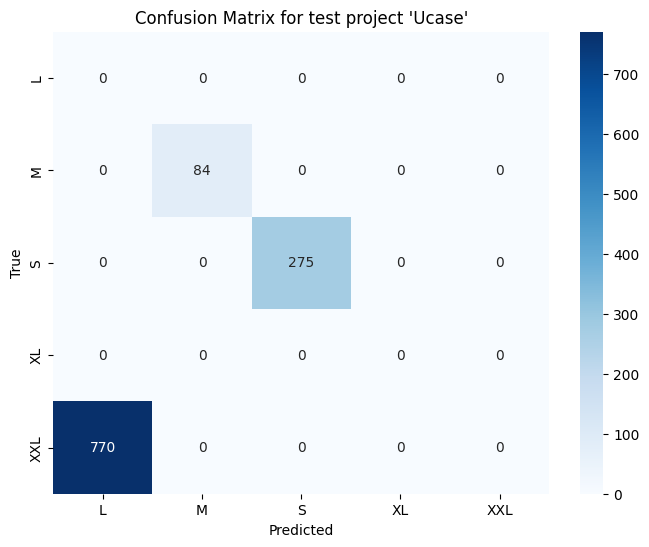

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      1.00      1.00       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00       770

   micro avg       1.00      1.00      1.00      1129
   macro avg       0.60      0.60      0.60      1129
weighted avg       1.00      1.00      1.00      1129
 samples avg       1.00      1.00      1.00      1129

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

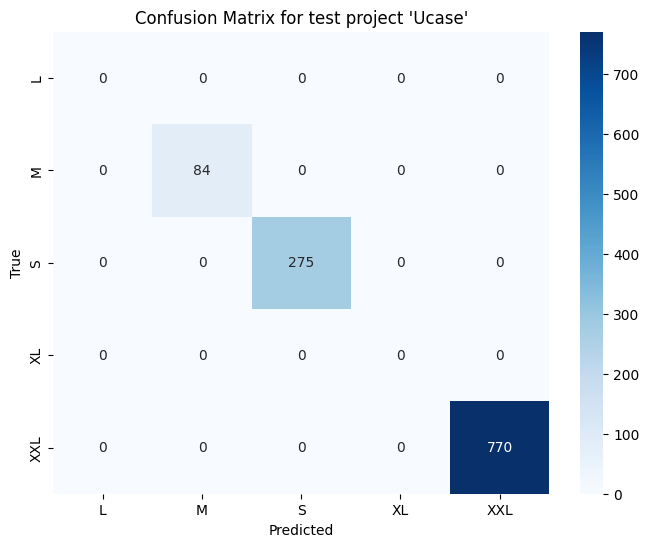

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.15      1.00      0.25        84
           S       0.37      1.00      0.54       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67       770

   micro avg       0.44      0.66      0.52      1129
   macro avg       0.30      0.50      0.29      1129
weighted avg       0.78      0.66      0.61      1129
 samples avg       0.57      0.66      0.60      1129

Precision: 0.7828459113142191     Recall: 0.6589902568644819      Accuracy: 0.4871567759078831      F1 Score: 0.6050028648152442

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

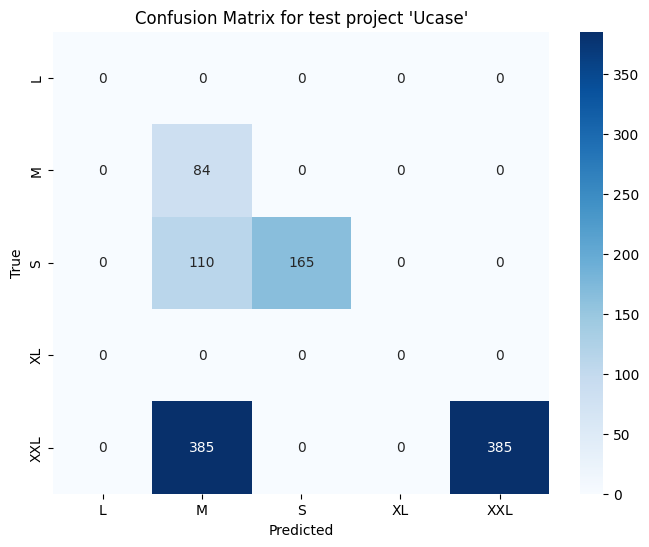

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      0.71      0.83       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       1.00      0.22      0.36      1624
   macro avg       0.40      0.34      0.37      1624
weighted avg       0.29      0.22      0.25      1624
 samples avg       0.22      0.22      0.22      1624



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.28879310344827586     Recall: 0.2210591133004926      Accuracy: 0.2210591133004926      F1 Score: 0.2492816091954023

Confusion matrix for test project 'DFD Generator':


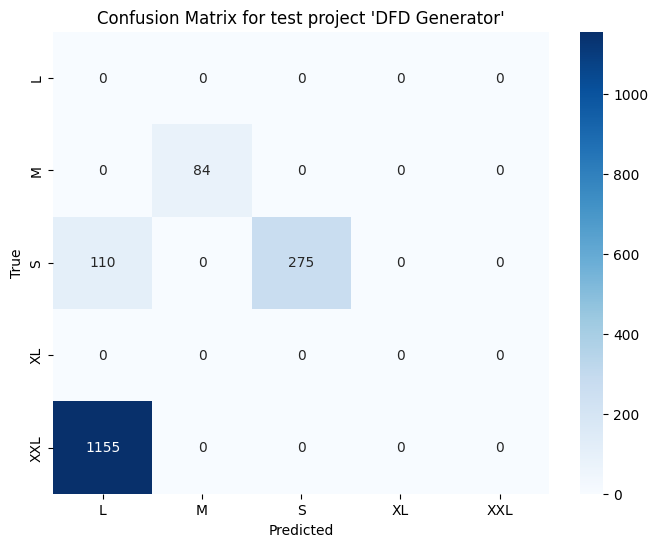

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.18      1.00      0.30        84
           S       1.00      1.00      1.00       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.55      0.29      0.38      1624
   macro avg       0.24      0.40      0.26      1624
weighted avg       0.25      0.29      0.25      1624
 samples avg       0.29      0.29      0.29      1624

Precision: 0.24633299022130725     Recall: 0.28879310344827586      Accuracy: 0.28879310344827586      F1 Score: 0.252782627673505

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

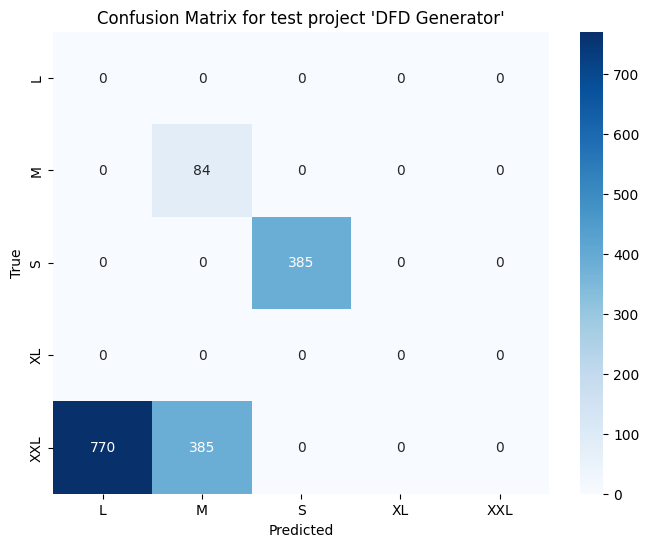

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.43      1.00      0.60        84
           S       0.72      0.57      0.64       385
          XL       0.00      0.00      0.00         0
         XXL       0.88      0.67      0.76      1155

   micro avg       0.78      0.66      0.72      1624
   macro avg       0.41      0.45      0.40      1624
weighted avg       0.82      0.66      0.72      1624
 samples avg       0.60      0.66      0.62      1624

Precision: 0.8162651201189964     Recall: 0.6613300492610837      Accuracy: 0.541871921182266      F1 Score: 0.7208622009692018

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

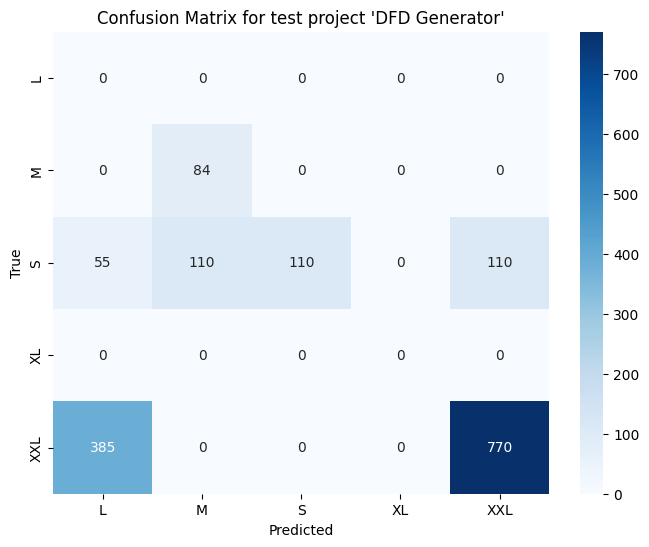

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.29      0.71      0.42       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.21      0.17      0.19      2174
   macro avg       0.26      0.34      0.28      2174
weighted avg       0.09      0.17      0.11      2174
 samples avg       0.17      0.17      0.17      2174

Precision: 0.09072460630986526     Recall: 0.16513339466421342      Accuracy: 0.16513339466421342      F1 Score: 0.11242716957988348

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

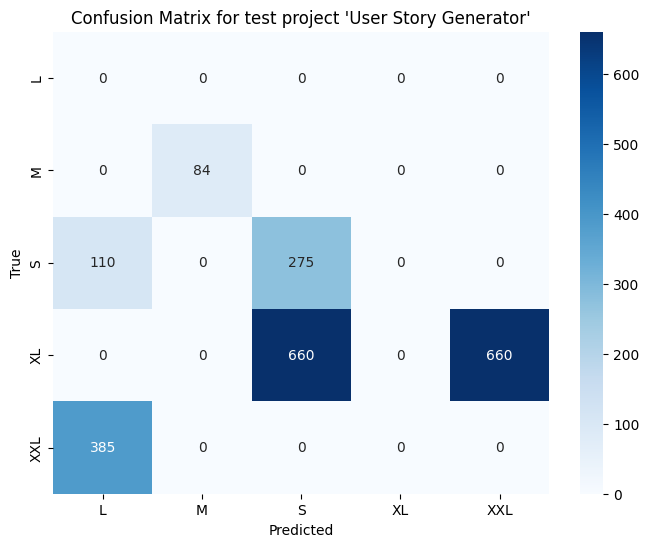

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.29      0.71      0.42       385
          XL       0.00      0.00      0.00      1320
         XXL       0.33      1.00      0.50       385

   micro avg       0.34      0.34      0.34      2174
   macro avg       0.33      0.54      0.38      2174
weighted avg       0.15      0.34      0.20      2174
 samples avg       0.34      0.34      0.34      2174

Precision: 0.1497555784043148     Recall: 0.3422263109475621      Accuracy: 0.3422263109475621      F1 Score: 0.2009736277215578

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

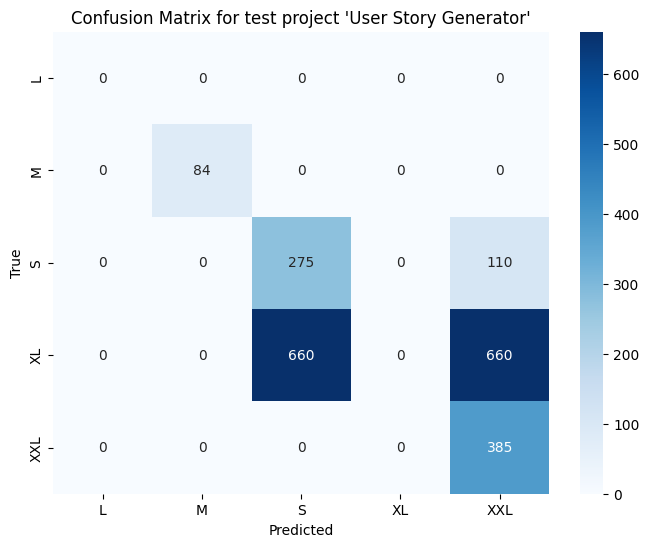

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.43      1.00      0.60        84
           S       0.18      1.00      0.30       385
          XL       0.00      0.00      0.00      1320
         XXL       0.88      1.00      0.93       385

   micro avg       0.30      0.39      0.34      2174
   macro avg       0.30      0.60      0.37      2174
weighted avg       0.20      0.39      0.24      2174
 samples avg       0.25      0.39      0.30      2174

Precision: 0.20304825519305786     Recall: 0.39282428702851885      Accuracy: 0.10119595216191353      F1 Score: 0.24192362321447497

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

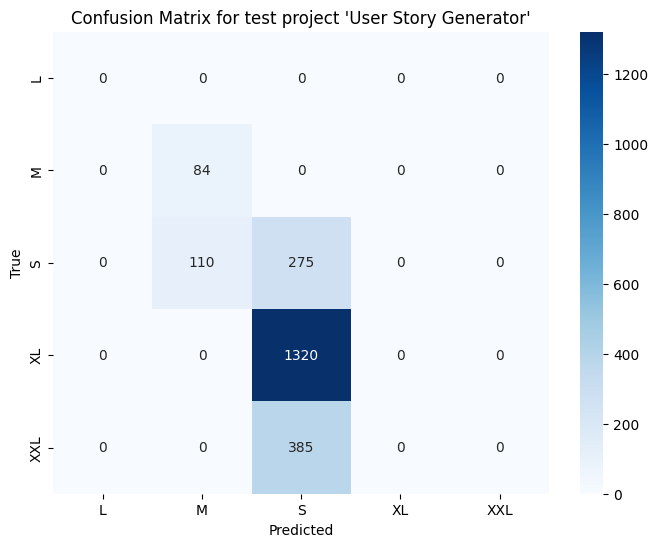

In [12]:
# Model (Teks) <== TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

unique_projects = df['Project Name'].unique()


accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = integrated_data.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = integrated_data.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [13]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.354244,0.091153,0.091153,0.030298,0.164235,0.216298,0.118884,0.160091,0.254541,0.251185,0.059039,0.216249
1,Jisebi Checker,0.316377,0.344180,0.344180,0.329694,0.711928,0.826033,0.826033,0.764151,0.413016,0.413016,0.206508,0.413016
2,Novelty Checker,0.902778,0.750000,0.750000,0.784598,0.902778,0.750000,0.750000,0.784598,0.902778,0.750000,0.562500,0.784598
3,Journal Database Reviewer,0.080321,0.253876,0.253876,0.121494,0.102554,0.227229,0.200581,0.140875,0.221608,0.387112,0.079942,0.268919
4,Git Trackr,0.094216,0.110775,0.110775,0.101827,0.166163,0.110775,0.110775,0.132931,0.777066,0.860020,0.720040,0.794102
5,Seareq,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.892857,0.812500,0.000000,0.792308
6,Sales Monitoring on Multimarket,0.641287,0.460087,0.460087,0.532657,0.720610,0.340348,0.340348,0.462264,0.299665,0.481132,0.079826,0.346110
7,Ucase,0.317981,0.317981,0.317981,0.317981,1.000000,1.000000,1.000000,1.000000,0.782846,0.658990,0.487157,0.605003
8,DFD Generator,0.288793,0.221059,0.221059,0.249282,0.246333,0.288793,0.288793,0.252783,0.816265,0.661330,0.541872,0.720862
9,User Story Generator,0.090725,0.165133,0.165133,0.112427,0.149756,0.342226,0.342226,0.200974,0.203048,0.392824,0.101196,0.241924


In [14]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.2964244781527042, 0.42276407304060903, 0.28380800314627064]
